Classification using MNIST data

In [154]:
from sklearn.datasets import fetch_openml
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [65]:
!env| grep -i http

HTTPS_PROXY=
HTTP_PROXY=


In [66]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X, y

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array(['5', '0', '4', ..., '4', '5', '6'], dtype=object))

In [67]:
print(X.shape, y.shape)

(70000, 784) (70000,)


There are 70000 images. Lets view one randomly

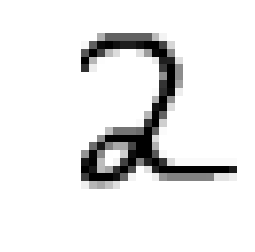

In [68]:
np.random.seed(10)
rand_idx = np.random.randint(70001)
some_digit = X[rand_idx]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [69]:
# Let us check the label 
y[rand_idx]

'2'

#### Create train and test set

In [70]:
# For MNIST they have the train and test seggregated neatly.
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [71]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

#### Training a Binary classifier

In [72]:
# Let us train a model to find digit '5'
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [73]:
# Let us use Stochastic Gradient Descent (SGD) classifier
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

D:\softwares\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [74]:
sample_digit = X[0]
sgd_clf.predict([sample_digit])

array([ True])

In [75]:
y[0]

'5'

### Performance Measures

Measuring Accuracy using cross-validation

In [76]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)
sgd_clf = SGDClassifier(random_state=42)

for train_idx, test_idx in skfolds.split(X_train, y_train):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_idx]
    y_train_folds = y_train_5[train_idx]
    X_test_fold = X_train[test_idx]
    y_test_fold = y_train_5[test_idx]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct/len(y_pred))

D:\softwares\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.9602079584083183


D:\softwares\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.9538976948847442


D:\softwares\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.9550432564884733


In [77]:
# Readily use sklearn cross_val_score
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

D:\softwares\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
D:\softwares\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
D:\softwares\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol

array([0.95795, 0.95845, 0.9582 ])

The accuracy of 95% and above looks deceptive.
Let us try a naive classifier where we predict everything as non-5

In [78]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [79]:
# Lets check the model accuracy!
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9096 , 0.9075 , 0.91185])

 The accuracy of the Never5Classifier is surprisingly > 90%.
 Accuracy is not a great measure when we have highly imbalanced classes 

#### Confusion Matrix

In [80]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# cross_val_predict does k-fold cv but returns predictions instead of scores
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)
print(y_train_pred)


confusion_matrix(y_train_5,y_train_pred=='5' )


D:\softwares\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
D:\softwares\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
D:\softwares\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol

['2' '3' '3' ... '5' '5' '1']


array([[53166,  1413],
       [ 1141,  4280]], dtype=int64)

Each row represents an actual class.
Each column represents a predicted class

$$ Precision = TP / (TP + FP)$$

$$ Recall = TP / (TP + FN)$$

In [81]:
## Precision and recall
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train_5, y_train_pred=='5'))
print(recall_score(y_train_5, y_train_pred=='5'))

0.751800456701212
0.7895222283711493


$$ F_{1} = 2*Precision*Recall / (Precision + Recall)$$

In [82]:
from sklearn.metrics import f1_score

print(f1_score(y_train_5, y_train_pred=='5'))

0.770199748065503


#### Precision / Recall Tradeoff

In [86]:
sgd_clf.fit(X_train, y_train_5)
y_scores = sgd_clf.decision_function([X[0]])
print(y_scores)

D:\softwares\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


[57573.34586702]


In [87]:
# Lowering the threshold
threshold = 0
y_some_digit_pred = y_scores > threshold
y_some_digit_pred

array([ True])

In [89]:
# Increasing the threshold
threshold = 60000
y_some_digit_pred = y_scores > threshold
y_some_digit_pred

array([False])

Raising the threshold decreases the recall. So how to determine what threshold to use

In [90]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function" )

D:\softwares\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
D:\softwares\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
D:\softwares\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol

In [96]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

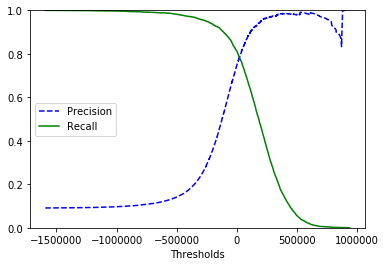

In [103]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Thresholds")
    plt.legend(loc="center left")
    plt.ylim([0,1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()
    

### Receiver Operating Characteristics (ROC) curve

 It plots a curve between the TPR vs FPR. 
 
 Where TPR is sensitivity, FPR is (1 - specificity)

In [106]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

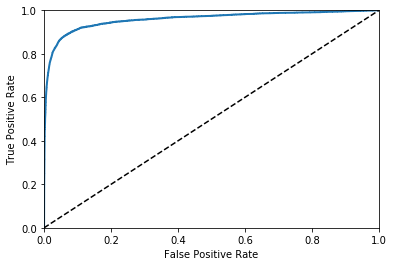

In [110]:
# plotting roc_curve
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr, tpr)
plt.show()

In [112]:
# roc_auc_score
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_train_5, y_scores))

0.9587231482841582


#### Prefer Precision / Recall curve to ROC_AUC when positive class is rare or when you care more about False Positives than the False Negatives

In [117]:
# Let us assess the ROC_AUC score for RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

# using positive class probability as scores
y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

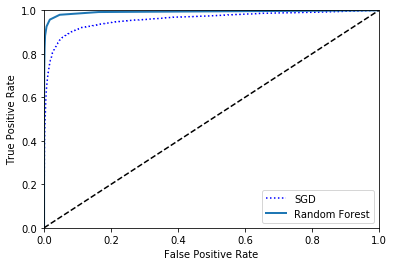

In [118]:
# Let us compare the roc_curves of SGD model and RF model
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [120]:
print(roc_auc_score(y_train_5, y_scores_forest))

0.9925808276252969


#### Multiclass classification 

In [ ]:
# multiclass classifiers or multinomial classifiers
# Example:
#           RandomForest
#           NaiveBayes
        
#   Whereas SVM and Linear classifiers are not
  
#   Most of them use OVA (One Vs All) or
#                    OVO (One Vs One) strategy
    
#   Using OVA for MNIST classification, we are creating 10 binary classifiers internally
#   whereas using OVO strategy, we will create 10 * 9 / 2 = 45 binary classifiers which 
#     classifies between all the combinations
    
#   When to prefer OVO vs OVA strategy ?
#     Example - SVM does not scale well with the increasing size of the dataset. So using
#     SVO strategy we can train many binary classfiers each handling a portion of data works
#     to your advantage

In [127]:
X_train.shape

(60000, 784)

In [131]:
# Let us train a SGD for multiclass problem of MNIST
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

D:\softwares\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


array(['2'], dtype='<U1')

In [133]:
# to understand how the classfier was trained (meaning - Which startegy was used)
some_digit_scores = sgd_clf.decision_function([some_digit])
print(some_digit_scores)

# We could see below that there were indeed 10 binary classifiers using OVA (One Vs All)
# strategy!

[[ -617603.02885526  -391298.99029276   346549.32916221  -382530.57126944
   -819211.19264521  -588943.77317762  -332441.08859278 -1012399.39699625
   -422955.06609969 -1121979.78129302]]


In [134]:
# And the highest score came for class 2
print(np.argmax(some_digit_scores))
print(sgd_clf.classes_[2])

2
2


In [139]:
# If we want we can explicitly use OneVsAll or OneVsOne strategy using sklearn APIs.
# For example, we could use SGD classifier with OneVsOne strategy as below

from sklearn.multiclass import OneVsOneClassifier
import warnings
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, tol=1e-3,random_state=42))

warnings.filterwarnings('ignore', 'Maximum number of iteration reached before convergence*')
ovo_clf.fit(X_train, y_train)
print(ovo_clf.predict([some_digit]))

len(ovo_clf.estimators_)

['2']


45

In [145]:
# training RandomForestClassifier is easier as it internally handles the Multiclass problem
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])


D:\softwares\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array(['2'], dtype=object)

In [146]:
# We can use predict_proba method for RF classifier
forest_clf.predict_proba([some_digit])

array([[0. , 0. , 0.9, 0. , 0. , 0. , 0.1, 0. , 0. , 0. ]])

In [144]:
# Using cross validation for SGD
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

D:\softwares\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
D:\softwares\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
D:\softwares\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol

array([0.88077385, 0.86389319, 0.87948192])

In [148]:
# The accuracy score sometimes increases if we use some sort scaling on the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
print(cross_val_score(sgd_clf, X_train_scaled, y_train, scoring="accuracy"))

D:\softwares\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
D:\softwares\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
D:\softwares\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and d

[0.91066787 0.90679534 0.90953643]


#### Error Analysis

In [149]:
# make predictions using cross_val_predict
# create confusion matrix
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
print(conf_mx)

D:\softwares\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
D:\softwares\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
D:\softwares\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol

[[5728    2   20   13   11   52   45    9   40    3]
 [   2 6480   47   26    5   44    9    9  109   11]
 [  55   43 5305  103   78   28   98   62  172   14]
 [  49   47  138 5367    3  211   36   56  130   94]
 [  23   26   34    8 5364   10   48   33   84  212]
 [  79   42   35  190   77 4601  111   28  168   90]
 [  34   24   49    3   45   90 5625    6   42    0]
 [  22   23   71   31   48   11    6 5789   16  248]
 [  57  153   65  169   14  157   61   24 5007  144]
 [  42   36   24   86  162   33    2  226   79 5259]]


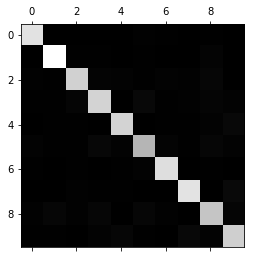

In [151]:
# let us use a matrix plot from matplotlib
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

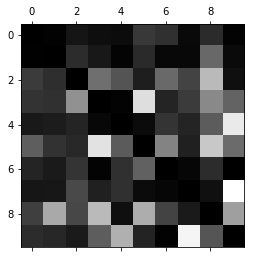

In [152]:
# Looks fairly good. But let us focus on the errors.
# 1 step - Let us divide each value in the matrix by the total number of images of that class
# where each row represents a class

row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

# now let us fill the diagonal with zero to retain only the errors which is of our interest here
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [163]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

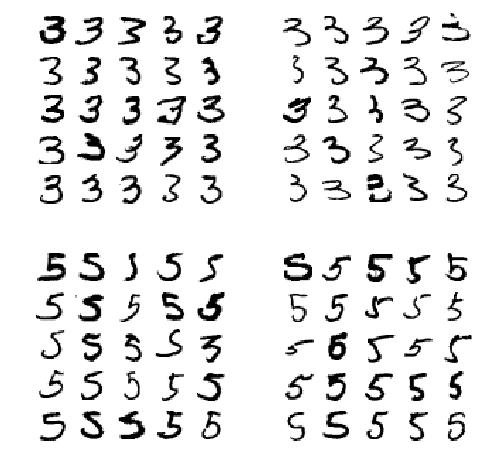

In [167]:
# Now we can see the kind of errors the classifier makes.

# For example,
# columns 8 & 9 are quite bright. Showing lot of misclassification of other digits as 8 / 9.
# Also 3 & 5 getting flipped

cl_a, cl_b = '3', '5'
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

#### Multilabel classification

In [170]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= '7')
y_train_odd = (y_train.astype(int) %2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [171]:
knn_clf.predict([some_digit])

array([[False, False]])

In [173]:
# One way of doing evaluation, is by averaging the f1_score
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.977097079400014